In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Handle missing values
# Assuming we want to drop rows with missing values
data.dropna(inplace=True)

# Check for and handle empty strings in numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = data[numerical_features].replace('', pd.NA)

# Convert each numerical column to numeric type
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Impute missing values in numerical columns if any
if data[numerical_features].isnull().any().any():
    imputer = SimpleImputer(strategy='median')
    data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Encode categorical variables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_features])

# Convert encoded features to a DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Drop the original categorical columns and concatenate the new encoded columns
data.drop(columns=categorical_features, inplace=True)
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Normalize/scale numerical features if necessary
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Save the cleaned and preprocessed data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

print("Data cleaning and preprocessing complete. The cleaned data is saved to 'cleaned_data.csv'.")


Data cleaning and preprocessing complete. The cleaned data is saved to 'cleaned_data.csv'.


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


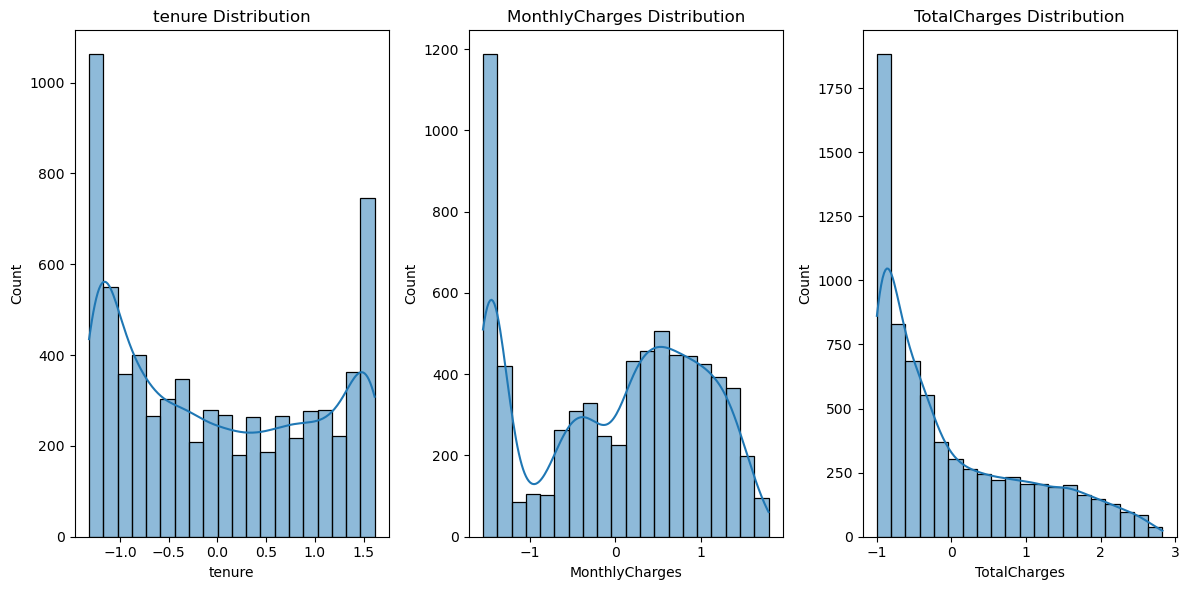

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Plot histograms for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



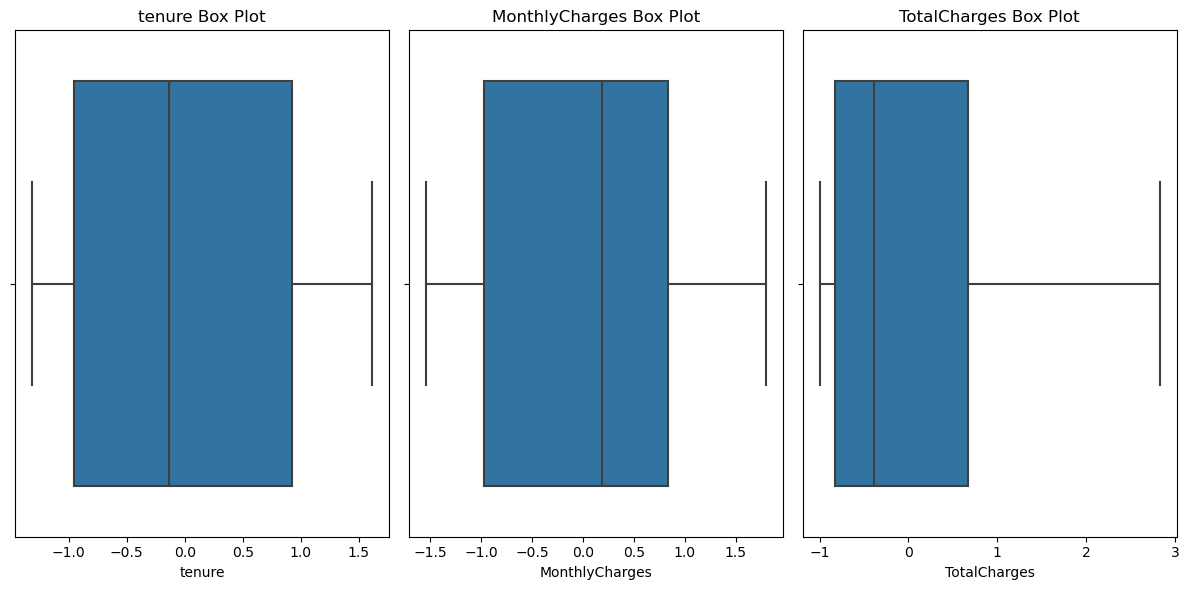

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Ensure numerical features are numeric (handle empty strings as NaN)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = data[numerical_features].replace('', pd.NA)

# Convert each numerical feature to numeric type
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Plot box plots for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[feature].dropna())  # Drop NaN values for plotting
    plt.title(f'{feature} Box Plot')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


In [13]:
# Categorize tenure into groups
bins = [0, 12, 24, 36, 48, 60, 72, 84]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)


In [14]:
# Calculate average monthly charges
data['avg_monthly_charges'] = data['TotalCharges'] / data['tenure'].replace(0, 1)


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)  # Choose number of components based on explained variance ratio
pca_components = pca.fit_transform(scaled_numerical)

# Add PCA components to DataFrame
data['PCA_Component1'] = pca_components[:, 0]
data['PCA_Component2'] = pca_components[:, 1]

# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")


Explained variance ratio: [0.7266421 0.2532504]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data_path = 'cleaned_data.csv'
data = pd.read_csv(data_path)

# Drop the 'customerID' column
data = data.drop(columns=['customerID'])

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Cross-validation and model evaluation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()

print(results)


{'Logistic Regression': 0.8019172546615371, 'Random Forest': 0.7905569888778741, 'Gradient Boosting': 0.7988992925149054, 'Support Vector Machine': 0.7957051289123264, 'Neural Network': 0.7550571236294348}


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[model_name] = {metric: scores[f'test_{metric}'].mean() for metric in scoring.keys()}

# Display the results
results


{'Logistic Regression': {'accuracy': 0.8019172546615371,
  'precision': 0.6541691193288253,
  'recall': 0.5427759197324415,
  'f1': 0.5923693128205791,
  'roc_auc': 0.7191887823489738},
 'Random Forest': {'accuracy': 0.7891360297304495,
  'precision': 0.6360300138302998,
  'recall': 0.48061984392419177,
  'f1': 0.5471994102428559,
  'roc_auc': 0.6906474144411687},
 'Gradient Boosting': {'accuracy': 0.799076754804169,
  'precision': 0.6605516740159973,
  'recall': 0.504675585284281,
  'f1': 0.5712392010391538,
  'roc_auc': 0.705092496507459},
 'Support Vector Machine': {'accuracy': 0.7957051289123264,
  'precision': 0.6578736762447723,
  'recall': 0.48193979933110365,
  'f1': 0.5558510062964693,
  'roc_auc': 0.6955383882950781},
 'Neural Network': {'accuracy': 0.7561209517400288,
  'precision': 0.5442219595243529,
  'recall': 0.4959420289855072,
  'f1': 0.5184628897953454,
  'roc_auc': 0.6730532335605676}}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Define parameter grid with compatible solver and penalty combinations
param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2', 'none'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200], 'l1_ratio': [0.5]},
]

# Instantiate the LogisticRegression model
log_reg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found: {'C': 0.01, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Best cross-validation accuracy: 0.8028050389203484
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

ROC-AUC Score: 0.8617582059271067


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
